# ML102 - Decision Trees
## 1. Demo

### 1.1. Import packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris, make_moons, load_wine
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


### 1.2. Ingest Data

This time, we will use a real dataset, called the iris dataset. 

In [2]:
# https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_iris.html
# https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = load_iris()
X = iris.data[:,2:]
y = iris.target
df=pd.DataFrame({
    iris.feature_names[2]: X[:,0],
    iris.feature_names[3]: X[:,1],
    'target': y
})
df['target name'] = df['target'].apply(lambda x: iris.target_names[x])
df.sample(frac=1).head(5)


,petal length (cm),petal width (cm),target,target name
21,1.5,0.4,0,setosa
9,1.5,0.1,0,setosa
91,4.6,1.4,1,versicolor
147,5.2,2.0,2,virginica
135,6.1,2.3,2,virginica


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

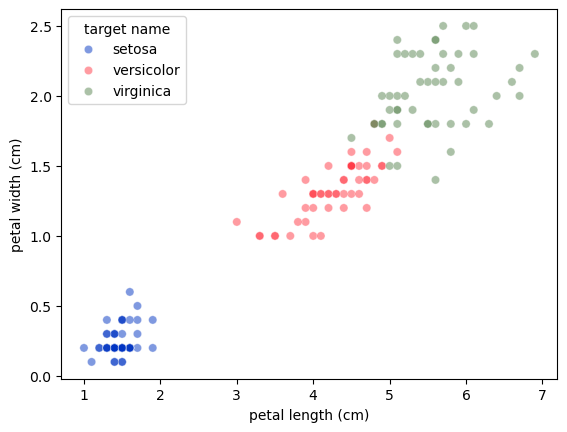

In [3]:
sns.scatterplot(data=df, x=iris.feature_names[2], y=iris.feature_names[3], hue = 'target name', palette=['#0034c3','#ff3845','#588550'], alpha = 0.5)

### 1.4. Fit a Logistic Regression model to the data

Scikit-learn makes it easy to create model instances. Check out [Scikit-learn's Decision Tree Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more information on the class' methods and attributes.

*Note*: We're not doing a train test split in this notebook, but in practice you really should!

In [4]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

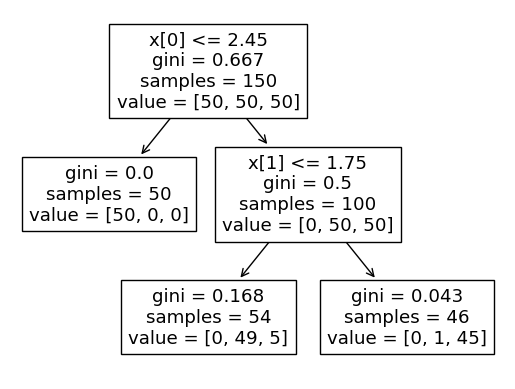

In [5]:
plot_tree(model);

### 1.5. Check the results

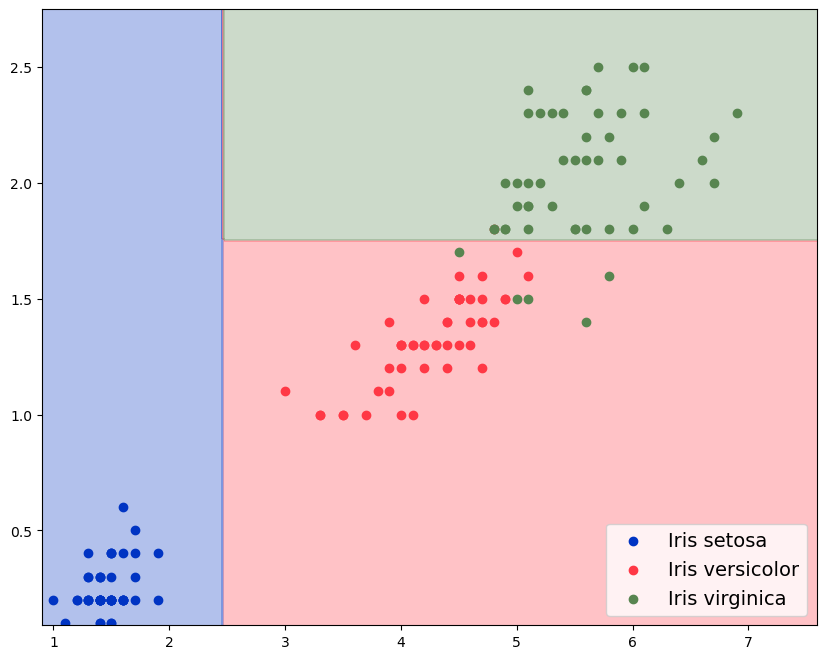

In [6]:
length_mesh = np.linspace(0.9*df['petal length (cm)'].min(), 1.1*df['petal length (cm)'].max(), 200)
width_mesh  = np.linspace(0.9*df['petal width (cm)'].min(), 1.1*df['petal width (cm)'].max(), 200)
x1, x2      = np.meshgrid(length_mesh, width_mesh)
x_mesh      = np.c_[x1.ravel(), x2.ravel()]
y_pred      = model.predict(x_mesh).reshape(x1.shape)

plt.figure(figsize=(10,8))
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=ListedColormap(['#0034c3','#ff3845','#588550']))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], c="#0034c3", label="Iris setosa")
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], c="#ff3845", label="Iris versicolor")
plt.scatter(X[:, 0][y==2], X[:, 1][y==2], c="#588550", label="Iris virginica")
plt.legend(loc="lower right", fontsize=14)


### 1.6. Evaluate the model

Given that the model predicts a 1 or 0 for each instance, and the true value is either a 1 or 0, we get the following cases, however, this time there are 3 classes as output. The below metrics still hold but __with respect to an individual class__
    
1. __True positives__: actual = 1, predicted = 1
2. __True negatives__: actual = 0, predicted = 0
3. __False positives__: actual = 0, predicted = 1
4. __False negatives__: actual = 1, predicted = 0

From this, we can calculate the following classification metrics (and more...):

1. __Accuracy__: TP + TN / total
2. __Precision__: TP / (TP + FP) (how many of the instances the model predicted as 1 were actually 1)
3. __Recall__: TP / (TP + FN) (how many of the overall actual 1's did the model predict as 1)

We can also visualise these values on a __Confusion matrix__

There is also a __Classification Report__ which neatly summarises the metrics for each class

You can learn more about the various metrics [here](https://scikit-learn.org/stable/api/sklearn.metrics.html) and [here](https://cohere.com/blog/classification-eval-metrics)

*Note*: again, this should really be done on the test set....

In [7]:
y_pred = model.predict(X)
print('Accuracy:', accuracy_score(y, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y, y_pred))
print('\nClassification Report:')
print(classification_report(y, y_pred))

Accuracy: 0.96

Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.98      0.94        50
           2       0.98      0.90      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



## 2. Examples of under and overfitting

In [8]:
Xm, ym = make_moons(n_samples=100, noise=0.28, random_state=53)
dfm = pd.DataFrame({'X1' : Xm[:,0], 'X2' : Xm[:,1], 'y' : ym})

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
deep_tree_clf3 = DecisionTreeClassifier(max_depth=3, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)
deep_tree_clf3.fit(Xm, ym)

DecisionTreeClassifier(max_depth=3, random_state=42)

<Axes: xlabel='X1', ylabel='X2'>

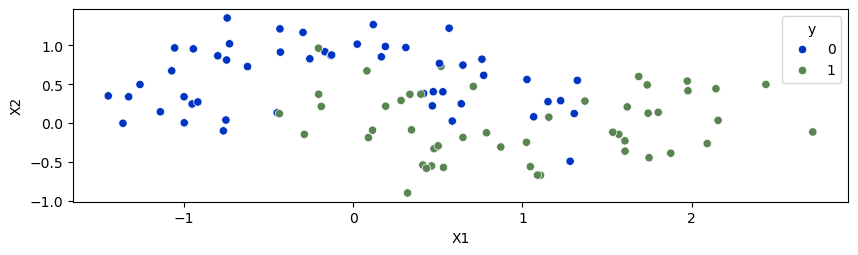

In [9]:
plt.figure(figsize = (10,2.5))
sns.scatterplot(data=dfm, x='X1', y='X2', hue = 'y', palette=['#0034c3','#588550'])

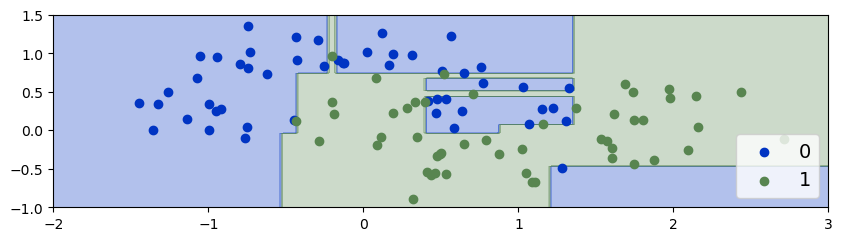

In [10]:
length_mesh = np.linspace(-2, 3, 200)
width_mesh  = np.linspace(-1, 1.5, 200)
x1, x2      = np.meshgrid(length_mesh, width_mesh)
x_mesh      = np.c_[x1.ravel(), x2.ravel()]
y_pred      = deep_tree_clf1.predict(x_mesh).reshape(x1.shape)

plt.figure(figsize=(10,2.5))
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=ListedColormap(['#0034c3','#588550']))
plt.scatter(Xm[:, 0][ym==0], Xm[:, 1][ym==0], c="#0034c3", label="0")
plt.scatter(Xm[:, 0][ym==1], Xm[:, 1][ym==1], c="#588550", label="1")
plt.legend(loc="lower right", fontsize=14)

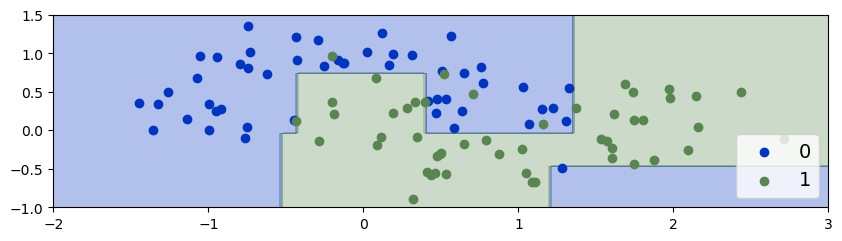

In [11]:
length_mesh = np.linspace(-2, 3, 200)
width_mesh  = np.linspace(-1, 1.5, 200)
x1, x2      = np.meshgrid(length_mesh, width_mesh)
x_mesh      = np.c_[x1.ravel(), x2.ravel()]
y_pred      = deep_tree_clf2.predict(x_mesh).reshape(x1.shape)

plt.figure(figsize=(10,2.5))
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=ListedColormap(['#0034c3','#588550']))
plt.scatter(Xm[:, 0][ym==0], Xm[:, 1][ym==0], c="#0034c3", label="0")
plt.scatter(Xm[:, 0][ym==1], Xm[:, 1][ym==1], c="#588550", label="1")
plt.legend(loc="lower right", fontsize=14)

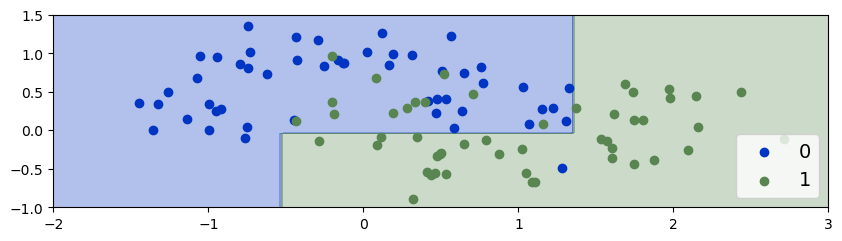

In [12]:
length_mesh = np.linspace(-2, 3, 200)
width_mesh  = np.linspace(-1, 1.5, 200)
x1, x2      = np.meshgrid(length_mesh, width_mesh)
x_mesh      = np.c_[x1.ravel(), x2.ravel()]
y_pred      = deep_tree_clf3.predict(x_mesh).reshape(x1.shape)

plt.figure(figsize=(10,2.5))
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=ListedColormap(['#0034c3','#588550']))
plt.scatter(Xm[:, 0][ym==0], Xm[:, 1][ym==0], c="#0034c3", label="0")
plt.scatter(Xm[:, 0][ym==1], Xm[:, 1][ym==1], c="#588550", label="1")
plt.legend(loc="lower right", fontsize=14)

### 3. Open Exercise

Below is a dataset for wine. You can read about the Scikit-learn loading method [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) and about the dataset itself [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset).

**Tasks**

1. Examine the dataset and its features
2. Split the dataset into train and test, making sure the split is reproducible (*Hint*: this is done in the linear regression code)
3. Perform some EDA - e.g. how does the target variable look against each feature? Can you spot any patterns?
4. Fit a decision tree with default settings, visualise, and evaluate it on the test set.
5. Now try modifying the hyperparameters (See [Scikit-learn's Decision Tree Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) to find a better fitting tree.

In [13]:
wine = load_wine()
X = wine.data
y = wine.target
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y
df.sample(frac=1).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0,0
107,12.72,1.75,2.28,22.5,84.0,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488.0,1
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
